# Ames Housing Sale Price Analysis

Olalekan Hammed Stephen

## Executive Summary

The goal of this project is to explore Sales prices with respect to factors such as the size, overall condition, age, sales years of the house to get insight that could drive business decisions.

## The Data

This project uses the Ames Housing dataset, which contains information about home sales in Ames, Iowa between 2006 and 2010.

In [88]:
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [89]:
file_path = "https://github.com/learn-co-curriculum/da-phase1-project-enterprise/raw/main/data/ames.csv"
df = pd.read_csv(file_path,index_col=0)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [90]:
# Checking size of dataframe
df.shape

(1460, 80)

In [91]:
# Review dataframe columns
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [92]:
# Select coloumns to work with into a dataframe
df_primary = df.filter(['SalePrice','OverallQual','TotRmsAbvGrd','OverallCond','YrSold','YearBuilt','LandSlope'])
df_primary.head()

,SalePrice,OverallQual,TotRmsAbvGrd,OverallCond,YrSold,YearBuilt,LandSlope
Id,,,,,,,
1,208500,7,8,5,2008,2003,Gtl
2,181500,6,6,8,2007,1976,Gtl
3,223500,7,6,5,2008,2001,Gtl
4,140000,7,7,5,2006,1915,Gtl
5,250000,8,9,5,2008,2000,Gtl


In [93]:
# Checking number of rows and columns of the working dataframe
df_primary.shape

(1460, 7)

In [94]:
# Reviewing variables of the working columns
df_primary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     1460 non-null   int64 
 1   OverallQual   1460 non-null   int64 
 2   TotRmsAbvGrd  1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   YrSold        1460 non-null   int64 
 5   YearBuilt     1460 non-null   int64 
 6   LandSlope     1460 non-null   object
dtypes: int64(6), object(1)
memory usage: 91.2+ KB


## Distribution of `SalePrice`

In [95]:
#ax = sns.displot(df_primary['SalePrice'])
#ax.fig.set_figwidth(11.7)
#ax.fig.set_figheight(8.27)
#ax.set(xlabel='Sale Price', ylabel = "Number of Houses")
#ax.set(title='Distribution of Sales Price');

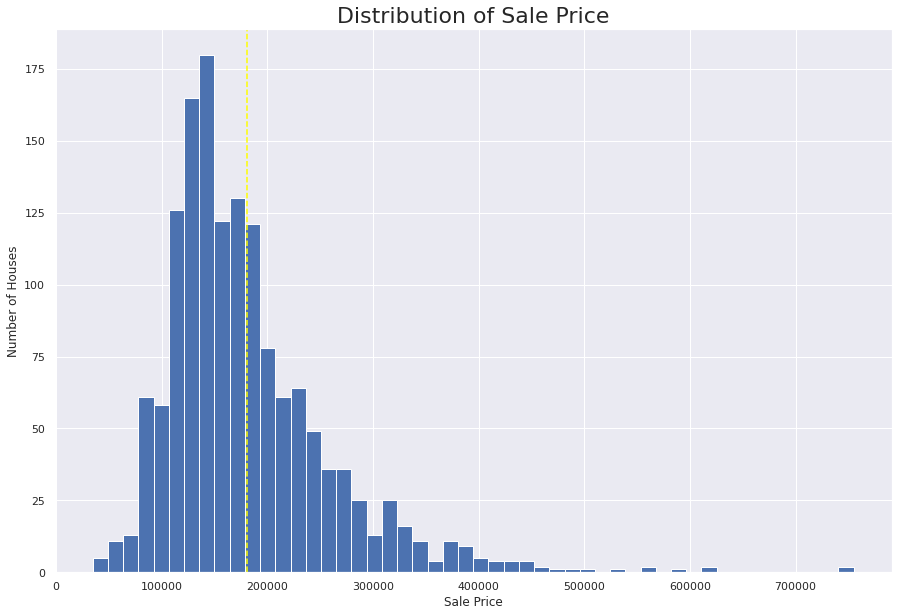

In [96]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.hist(df_primary['SalePrice'], bins=50);
ax.set_ylabel('Number of Houses')
ax.set_xlabel("Sale Price")
ax.set_title('Distribution of Sale Price', size=22)
plt.axvline(df_primary['SalePrice'].mean(), color='yellow', linestyle='dashed', linewidth=1.5,);

**Interpretation**

*   The distribution is positively skewed
*   That means the mean cannot be a good measure of centrality
*   Median is better measure of centrality in this case
*   There are outliers with respect to the sale price of over $700,000




## Differences between Subsets

The subsets are based on the overall conditions of Above Average for entries with 5 or more, Average for 5 and Below Average for less than 5 in the 'OverallCond column. This is represented on the graph based on the Sale price as well as the number of houses.

In [107]:
# Separate the data into overall condition subsets
abv_avg = df_primary[df_primary['OverallCond'] > 5]['SalePrice']
avg = df_primary[df_primary['OverallCond'] == 5]['SalePrice']
bel_avg = df_primary[df_primary['OverallCond'] < 5]['SalePrice']

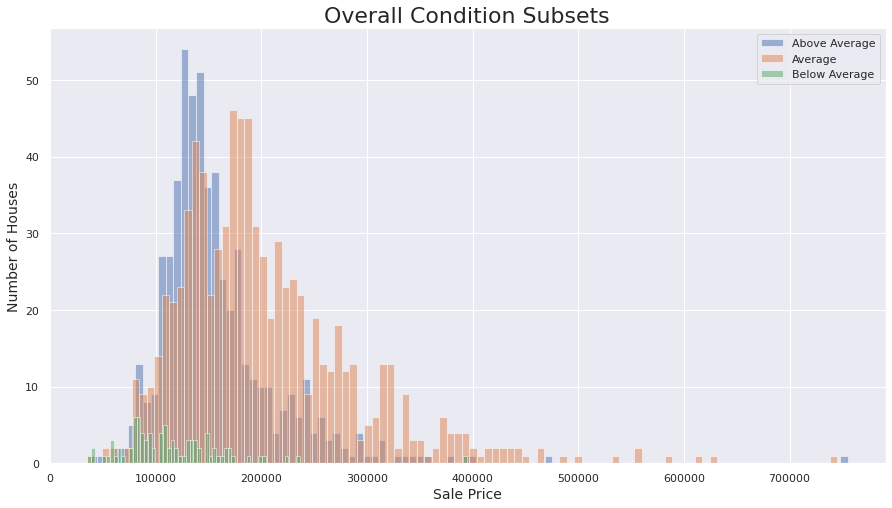

In [106]:
plt.figure(figsize=(15,8))
plt.hist(abv_avg, bins=100, alpha=0.5, label="Above Average")
plt.hist(avg, bins=100, alpha=0.5, label="Average");bel_avg 
plt.hist(bel_avg, bins=100, alpha=0.5, label="Below Average");
plt.xlabel("Sale Price", size=14)
plt.ylabel("Number of Houses", size=14)
plt.title("Overall Condition Subsets", size=22)
plt.legend(loc='upper right');

**Interpretation**

*   The are more houses with above average condition than there are average and below avertage in that order.




## Correlation between OverallQual and `SalePrice`

In [105]:
# Reviewing correlation of the variables with 
df_primary.corr()['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
TotRmsAbvGrd    0.533723
OverallCond    -0.077856
YrSold         -0.028923
YearBuilt       0.522897
Age            -0.523350
Name: SalePrice, dtype: float64

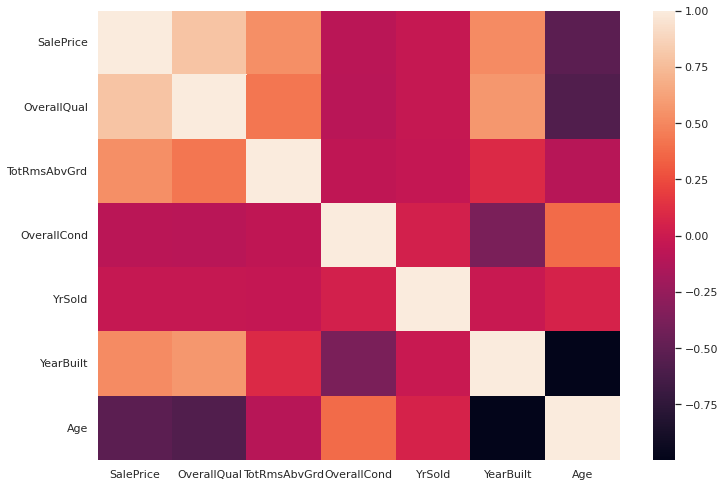

In [104]:
# Heatmap of the dataframe 
fig, ax = plt.subplots(figsize=(11.7, 8.27))
sns.heatmap(df_primary.corr())
plt.show()

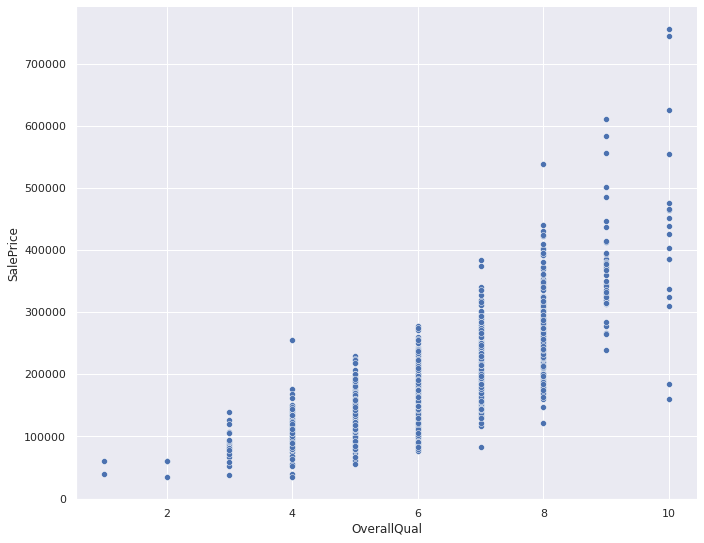

In [103]:
ax = sns.relplot(x="OverallQual", y="SalePrice", data=df_primary);
ax.fig.set_figwidth(11.7)
ax.fig.set_figheight(8.27)

**Interpretation:**

*   There's 0.790982 correlation between OverallQual and SalePrice
*   Hence a positive relationship between the price of the house and the Overall Quality

*  As such, as the overall quality increase, there's upward movement of the Sale Price






## Engineered Feature: [Age]

TODO: edit the above heading so it says the name of the new feature you created

In [102]:
# Checking dataframe columns
df_primary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     1460 non-null   int64 
 1   OverallQual   1460 non-null   int64 
 2   TotRmsAbvGrd  1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   YrSold        1460 non-null   int64 
 5   YearBuilt     1460 non-null   int64 
 6   LandSlope     1460 non-null   object
 7   Age           1460 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 134.9+ KB


In [100]:
# Engineering Age column
df_primary['Age'] = df_primary['YrSold'] - df_primary['YearBuilt']
df_primary.head(3)

,SalePrice,OverallQual,TotRmsAbvGrd,OverallCond,YrSold,YearBuilt,LandSlope,Age
Id,,,,,,,,
1,208500,7,8,5,2008,2003,Gtl,5
2,181500,6,6,8,2007,1976,Gtl,31
3,223500,7,6,5,2008,2001,Gtl,7


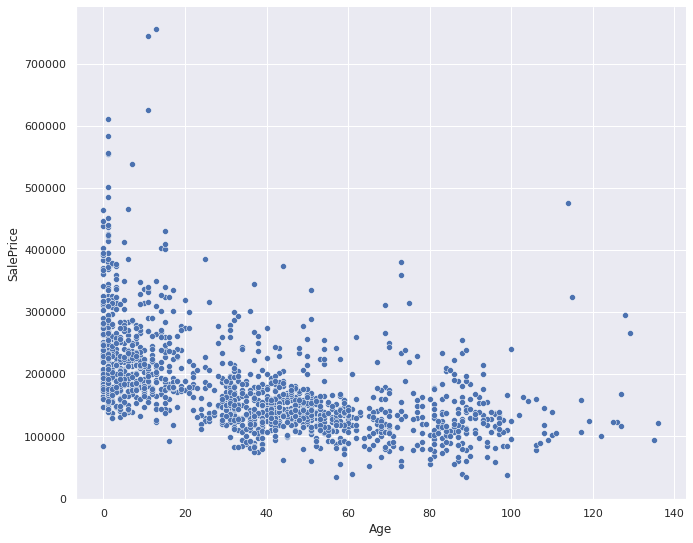

In [101]:
# Correlation between Age and SalePrice
ax = sns.relplot(x="Age", y="SalePrice", data=df_primary);
ax.fig.set_figwidth(11.7)
ax.fig.set_figheight(8.27)

Interpretation:

*   There's positive correlation  between the age of the house and Sale price
*   Such that - the older the house the lesser the Sale Price

